#SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Assignments/SVM support vector machine/mushroom.csv")
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

- Most of the data here is categorical data, we must encode them using label encoder because the data is already in high dimensions and if we use one hot encoding we might increase the dimensionality of the data to much higher rate

In [4]:
data.shape

(2000, 26)

In [5]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [6]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

- From this basic information we can say that , unnamed can be dropped and all the categorical data should be encoded, and there are no null values for us to imputate or drop

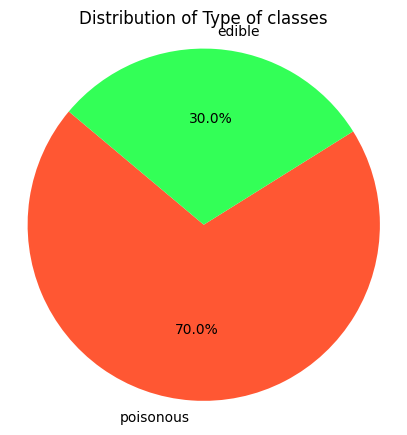

In [7]:
num_counts = data['class'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#33FFF5', '#FF5733', '#57FF33'])
plt.title('Distribution of Type of classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- In the Data there are 30% edible type mushrooms and 70% poisonous type mushrooms

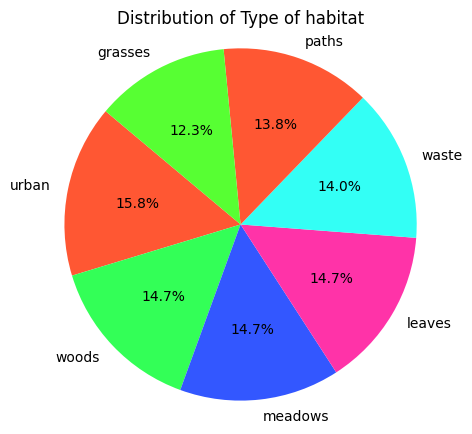

In [8]:
num_counts = data['habitat'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#33FFF5', '#FF5733', '#57FF33'])
plt.title('Distribution of Type of habitat')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- the classes maybe two types but they grow over 7 different areas like on grasses, leaves, woods, meadows, some over the waste etc

In [9]:
habitat_group = data.groupby('habitat').size().reset_index(name='count')

# Display the grouped data
print(habitat_group)

   habitat  count
0  grasses    247
1   leaves    293
2  meadows    294
3    paths    275
4    urban    316
5    waste    280
6    woods    295


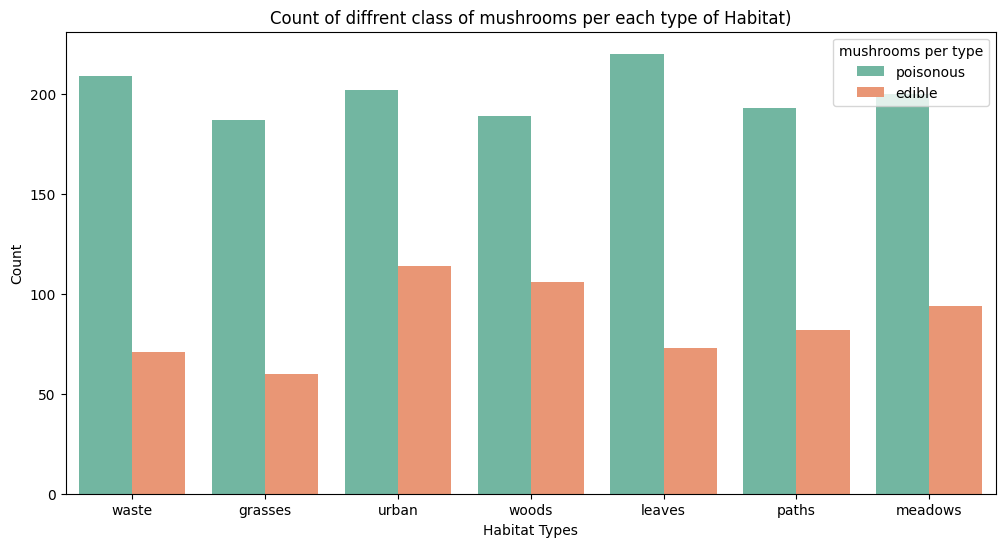

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='habitat', hue='class', palette='Set2')

# Add labels and title
plt.xlabel('Habitat Types')
plt.ylabel('Count')
plt.title('Count of diffrent class of mushrooms per each type of Habitat)')
plt.legend(title='mushrooms per type', loc='upper right')

# Show the plot
plt.show()

- the poisonous musrooms grow in very huge numbers everywhere and edible are less compared to the poisonous ones
- the edible mushrooms grow a bit more in number, in habitats such as woods and urban

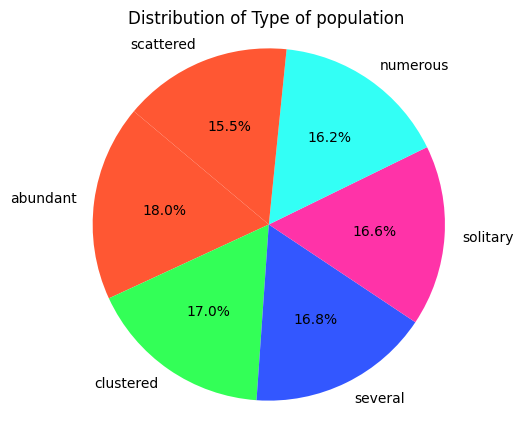

In [11]:
num_counts = data['population'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5,5))
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%', startangle=140, colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A8', '#33FFF5', '#FF5733', '#57FF33'])
plt.title('Distribution of Type of population ')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- This shows us the way the mushrooms grow, some grow in a clustered population, some grow abundant, some grow in scattered  and some grow in solitary

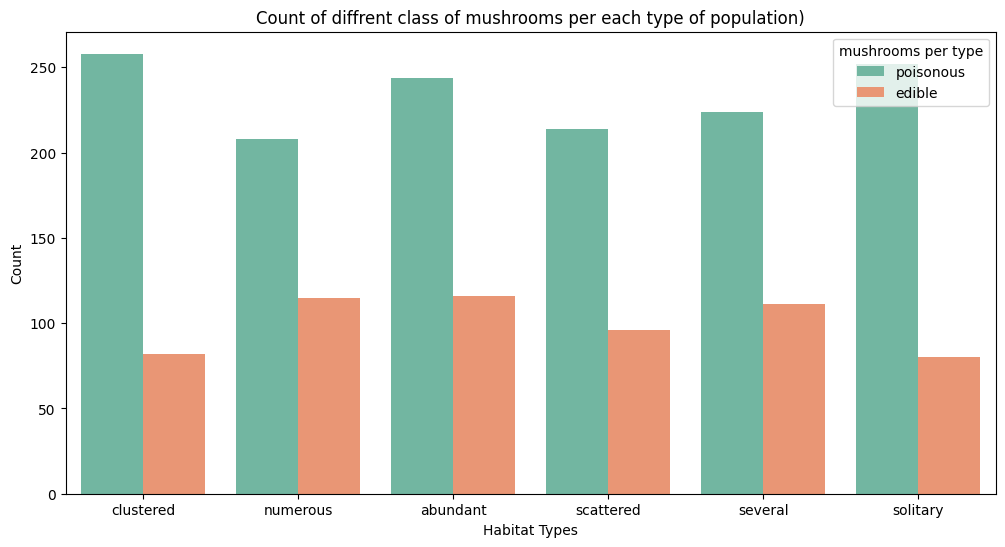

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='population', hue='class', palette='Set2')

# Add labels and title
plt.xlabel('Habitat Types')
plt.ylabel('Count')
plt.title('Count of diffrent class of mushrooms per each type of population)')
plt.legend(title='mushrooms per type', loc='upper right')

# Show the plot
plt.show()

- even here the number of poisonous mushrooms growing is far more in number than the edible mushrooms even by population

In [13]:
group1=data.groupby(["class","cap_shape"]).size().reset_index(name='count')
group1

,class,cap_shape,count
0,edible,bell,117
1,edible,conical,111
2,edible,convex,131
3,edible,flat,107
4,edible,sunken,134
5,poisonous,bell,280
6,poisonous,conical,270
7,poisonous,convex,250
8,poisonous,flat,295
9,poisonous,sunken,305


- Here, the data has been grouped by the shape of the mushroom cap with seperation with class

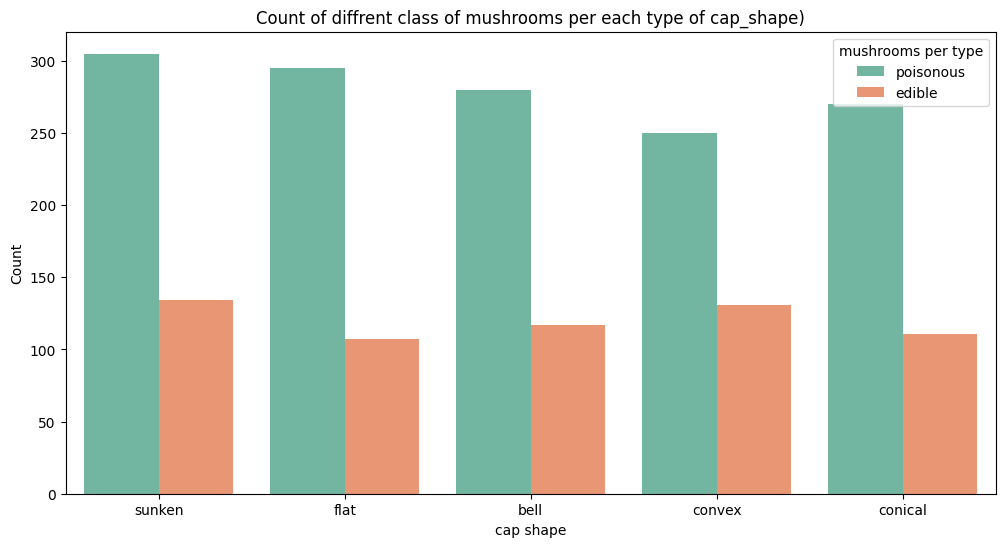

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='cap_shape', hue='class', palette='Set2')

# Add labels and title
plt.xlabel('cap shape')
plt.ylabel('Count')
plt.title('Count of diffrent class of mushrooms per each type of cap_shape)')
plt.legend(title='mushrooms per type', loc='upper right')

# Show the plot
plt.show()

In [15]:
group1=data.groupby(["class","odor"]).size().reset_index(name='count')
group1

,class,odor,count
0,edible,almond,65
1,edible,anise,87
2,edible,creosote,69
3,edible,fishy,61
4,edible,foul,77
5,edible,musty,60
6,edible,none,49
7,edible,pungent,65
8,edible,spicy,67
9,poisonous,almond,138


In [16]:
mushroom=data.copy()
mushroom.head(2)

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319


In [17]:
mushroom1=mushroom.drop("Unnamed: 0",axis=1)
mushroom1.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
mushroom1.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [20]:
label_encoder = LabelEncoder()
mushroom1["cap_shape"] = label_encoder.fit_transform(mushroom["cap_shape"])

In [21]:
mushroom1["cap_surface"] = label_encoder.fit_transform(mushroom["cap_surface"])
mushroom1["cap_color"] = label_encoder.fit_transform(mushroom["cap_color"])
mushroom1["bruises"] = label_encoder.fit_transform(mushroom["bruises"])
mushroom1["odor"] = label_encoder.fit_transform(mushroom["odor"])
mushroom1["gill_attachment"] = label_encoder.fit_transform(mushroom["gill_attachment"])
mushroom1["gill_spacing"] = label_encoder.fit_transform(mushroom["gill_spacing"])
mushroom1["gill_size"] = label_encoder.fit_transform(mushroom["gill_size"])
mushroom1["gill_color"] = label_encoder.fit_transform(mushroom["gill_color"])
mushroom1["stalk_shape"] = label_encoder.fit_transform(mushroom["stalk_shape"])
mushroom1["stalk_root"] = label_encoder.fit_transform(mushroom["stalk_root"])
mushroom1["stalk_surface_above_ring"] = label_encoder.fit_transform(mushroom["stalk_surface_above_ring"])
mushroom1["stalk_surface_below_ring"] = label_encoder.fit_transform(mushroom["stalk_surface_below_ring"])
mushroom1["stalk_color_above_ring"] = label_encoder.fit_transform(mushroom["stalk_color_above_ring"])
mushroom1["stalk_color_below_ring"] = label_encoder.fit_transform(mushroom["stalk_color_below_ring"])
mushroom1["veil_type"] = label_encoder.fit_transform(mushroom["veil_type"])
mushroom1["veil_color"] = label_encoder.fit_transform(mushroom["veil_color"])
mushroom1["ring_number"] = label_encoder.fit_transform(mushroom["ring_number"])
mushroom1["ring_type"] = label_encoder.fit_transform(mushroom["ring_type"])
mushroom1["spore_print_color"] = label_encoder.fit_transform(mushroom["spore_print_color"])
mushroom1["population"] = label_encoder.fit_transform(mushroom["population"])
mushroom1["habitat"] = label_encoder.fit_transform(mushroom["habitat"])
mushroom1["class"] = label_encoder.fit_transform(mushroom["class"])

In [22]:
mushroom1.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


In [23]:
mushroom1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   int64  
 1   cap_surface               2000 non-null   int64  
 2   cap_color                 2000 non-null   int64  
 3   bruises                   2000 non-null   int64  
 4   odor                      2000 non-null   int64  
 5   gill_attachment           2000 non-null   int64  
 6   gill_spacing              2000 non-null   int64  
 7   gill_size                 2000 non-null   int64  
 8   gill_color                2000 non-null   int64  
 9   stalk_shape               2000 non-null   int64  
 10  stalk_root                2000 non-null   int64  
 11  stalk_surface_above_ring  2000 non-null   int64  
 12  stalk_surface_below_ring  2000 non-null   int64  
 13  stalk_color_above_ring    2000 non-null   int64  
 14  stalk_co

- Every attribute has been encoded using label encoder and converted them into labeled numbers

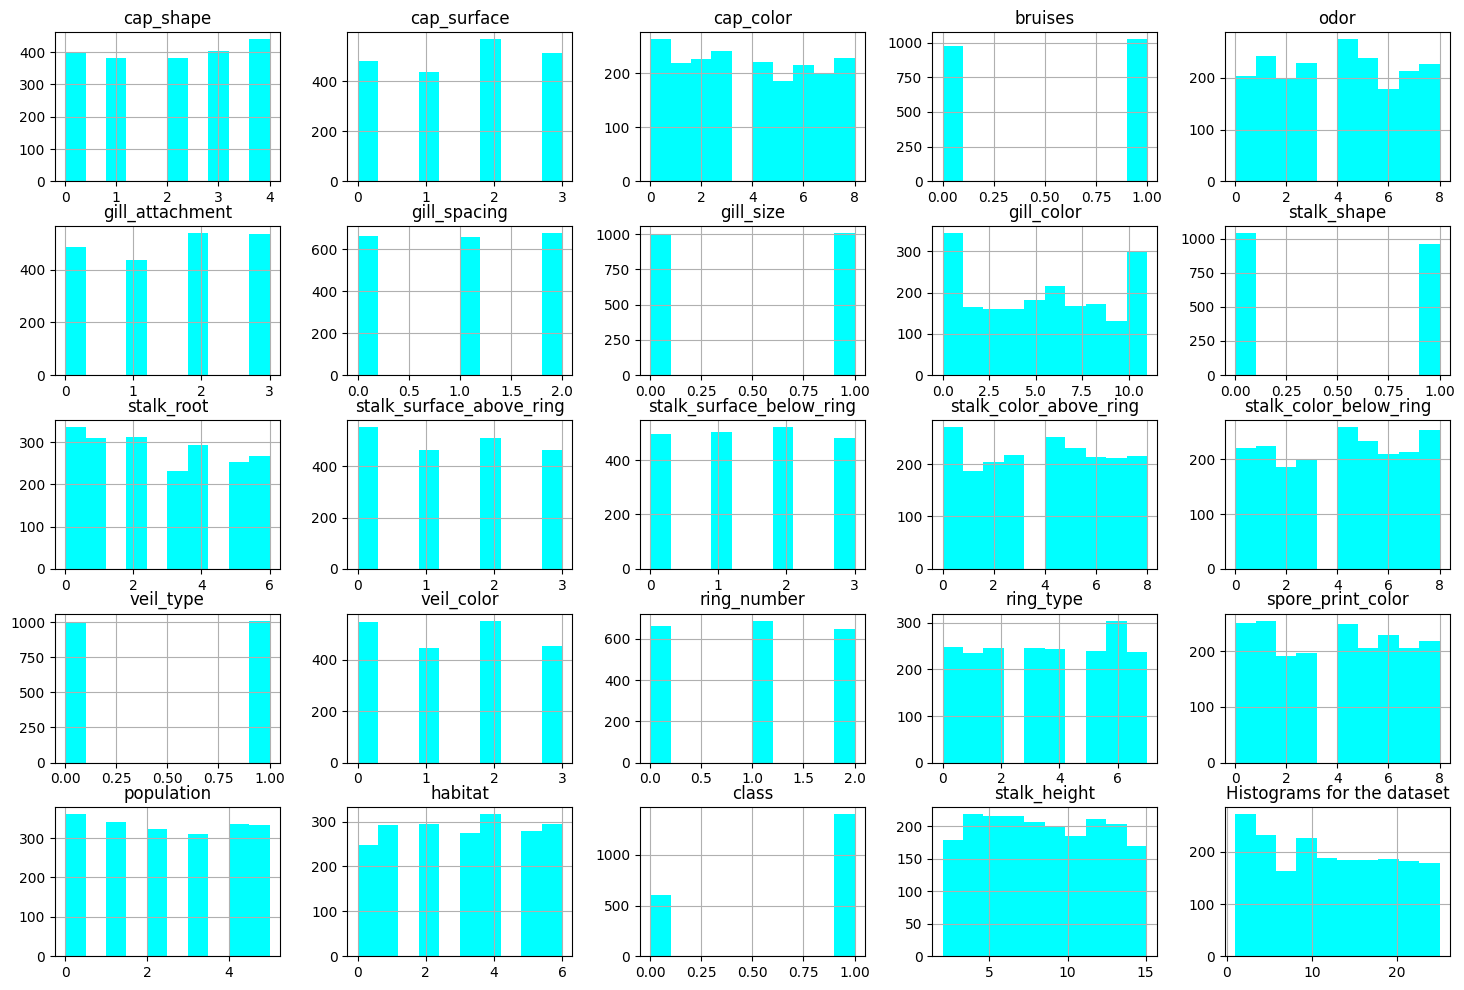

In [24]:
#PLotting the histogrmas to understand the data distribution
mushroom1.hist(figsize=(18,12),color="cyan")
plt.title("Histograms for the dataset")
plt.show()

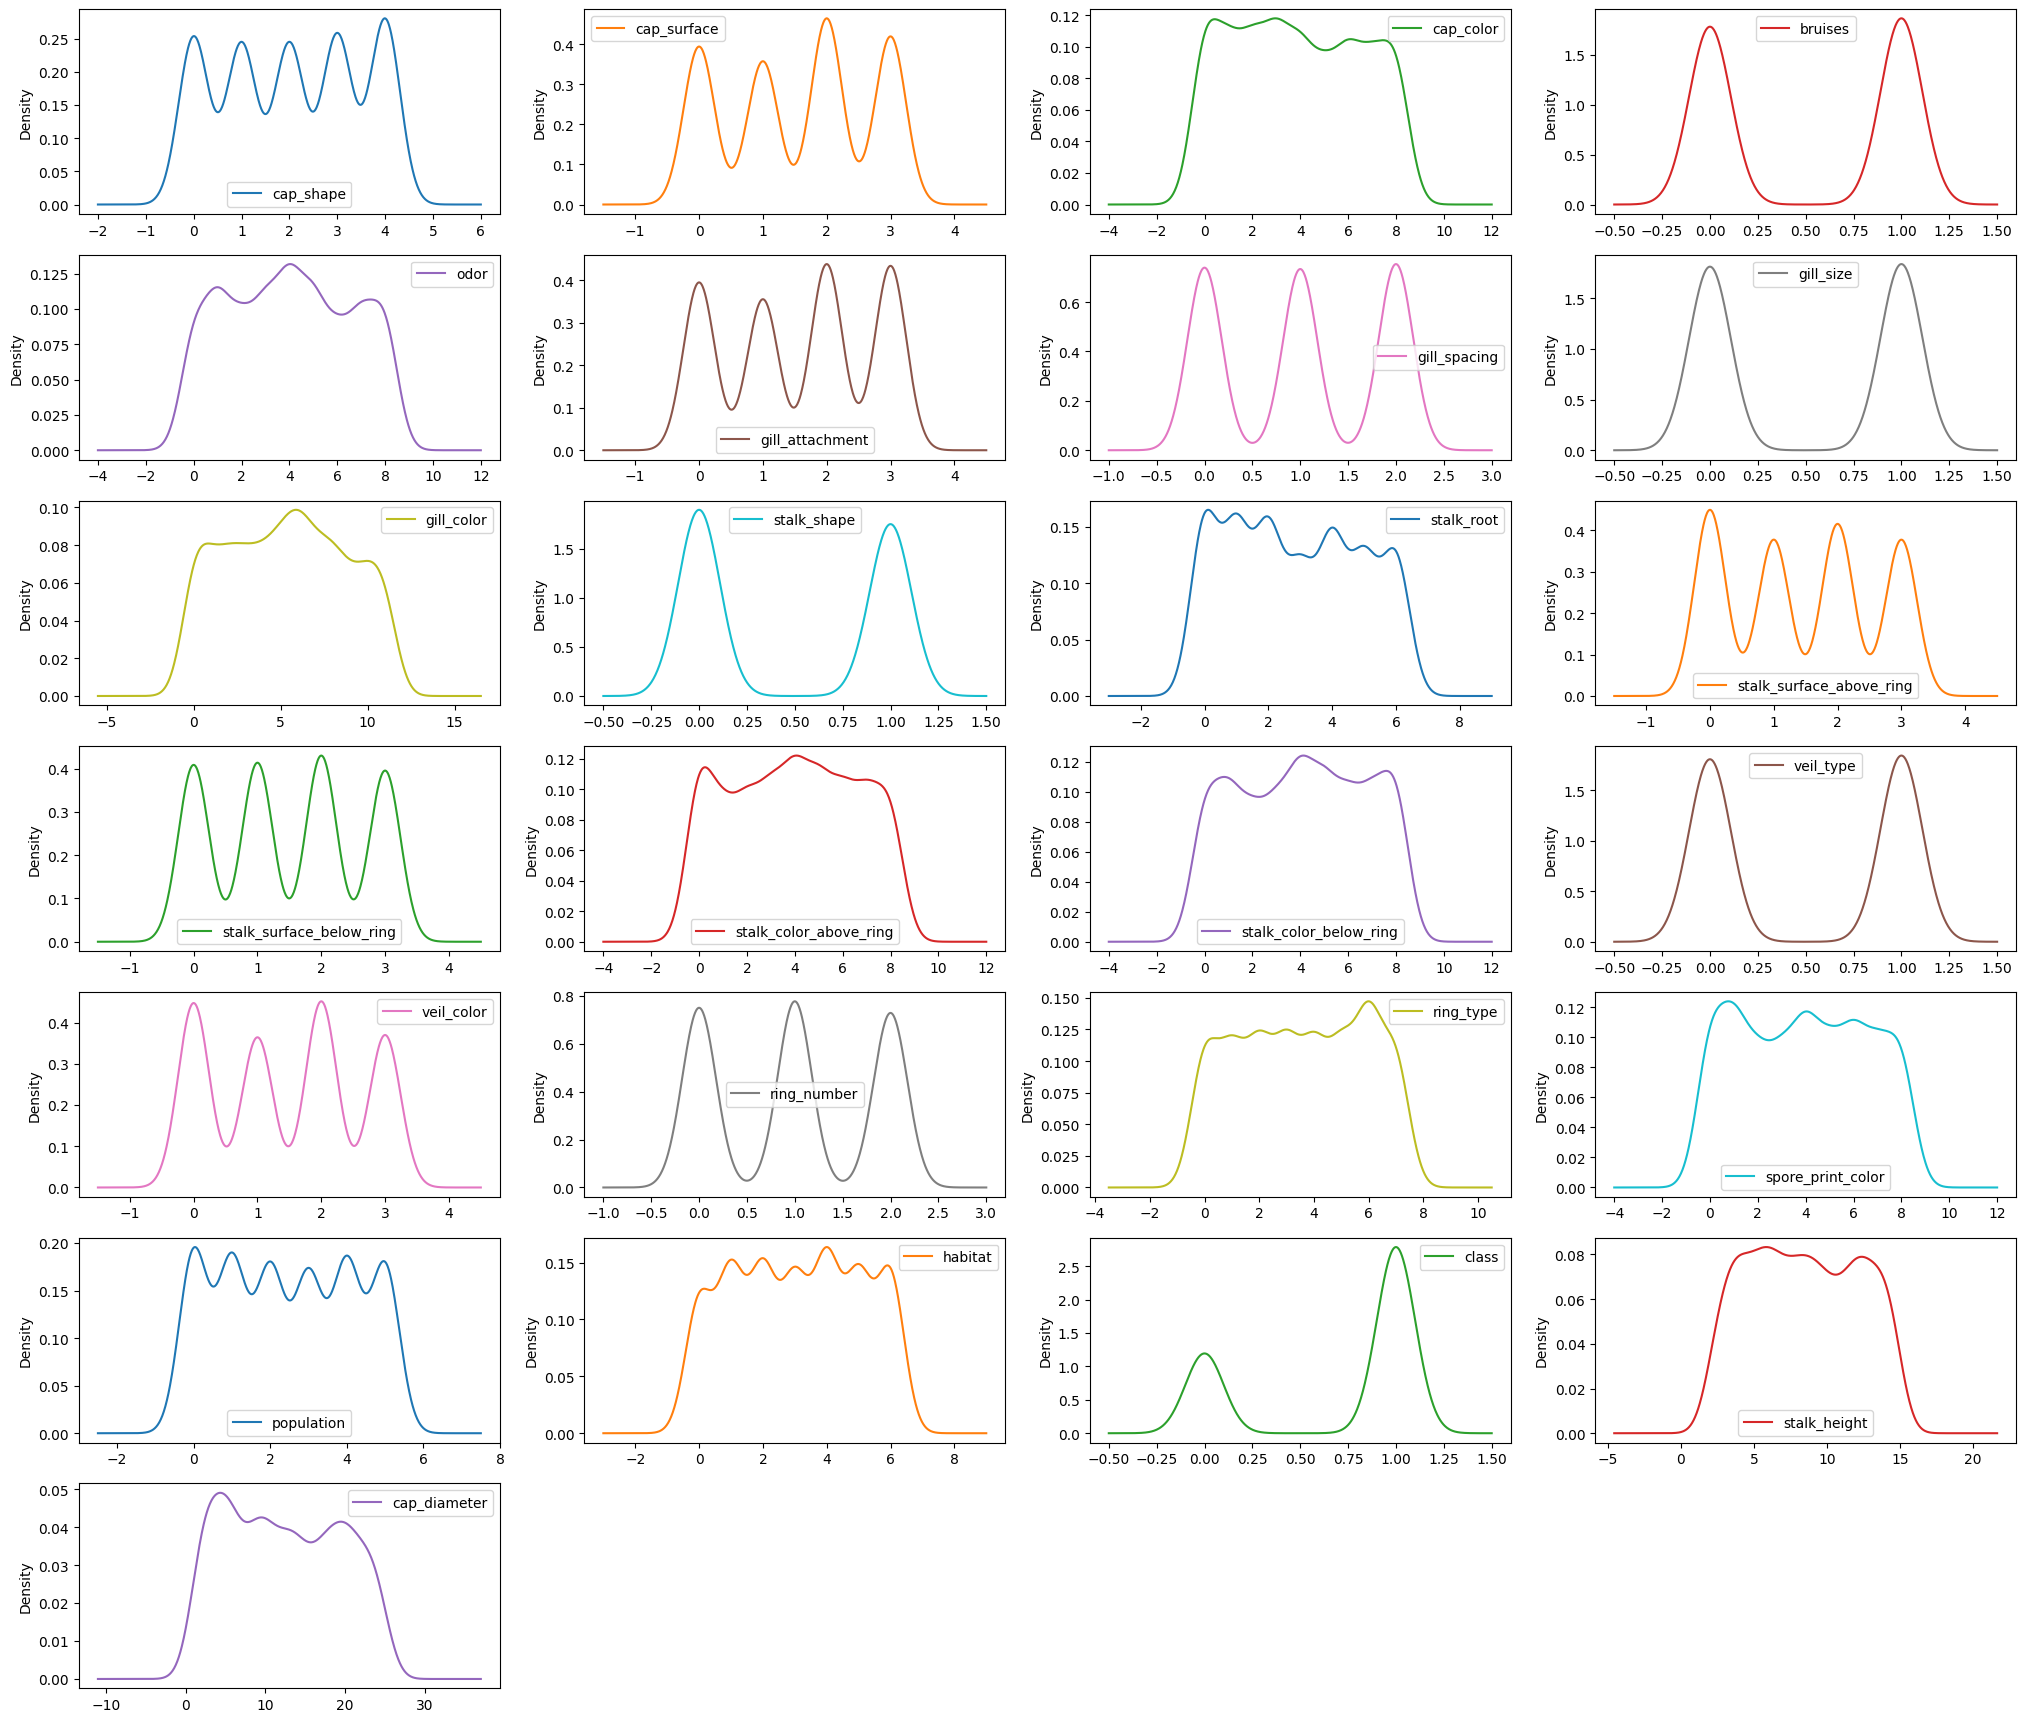

In [25]:
# Plotting the Density PLots to identify if the data distribution is skewed are not
mushroom1.plot(kind='density', subplots=True, layout=(8, 4), figsize=(25, 25), sharex=False)
plt.title("The KDE Plots for the data attributes")
plt.show()

In [26]:
mushroom1.skew()

cap_shape                  -0.049462
cap_surface                -0.107246
cap_color                   0.077343
bruises                    -0.046047
odor                        0.029704
gill_attachment            -0.102894
gill_spacing               -0.011984
gill_size                  -0.014011
gill_color                  0.026377
stalk_shape                 0.080124
stalk_root                  0.111068
stalk_surface_above_ring    0.043549
stalk_surface_below_ring   -0.000003
stalk_color_above_ring     -0.014504
stalk_color_below_ring     -0.045924
veil_type                  -0.020016
veil_color                  0.009469
ring_number                 0.017314
ring_type                  -0.056376
spore_print_color           0.024212
population                  0.028896
habitat                    -0.027341
class                      -0.873527
stalk_height                0.038312
cap_diameter                0.107595
dtype: float64

- Only class has a negative skewness or the data in it negatively skewed and other data has no much skewness that has significant effect over to model so no need of tranforming the data apart from the target variable

<Axes: >

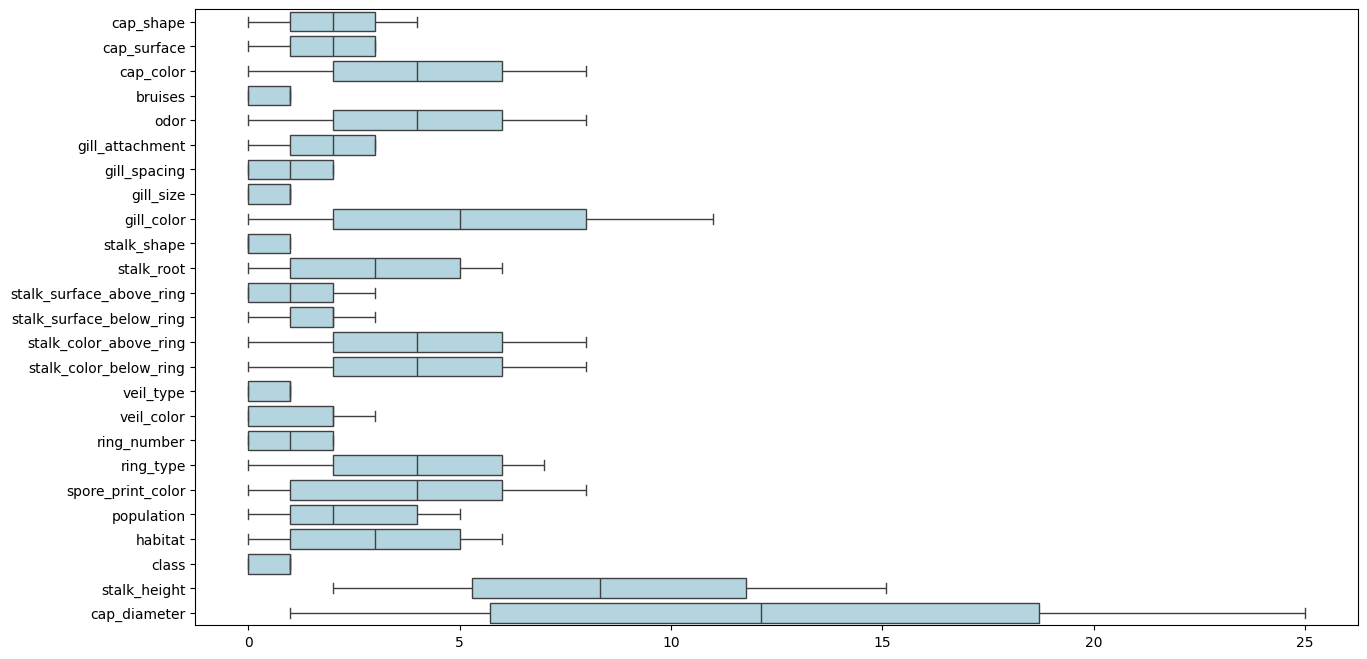

In [27]:
#Plotting the Box-Plot to see for the outliers the data has
plt.figure(figsize=(15,8))
sns.boxplot(data=mushroom1, orient="h", color="lightblue")

- No outliers are present in the data

In [28]:
#Finding the correlation matrix
correlation_matrix=mushroom1.corr()

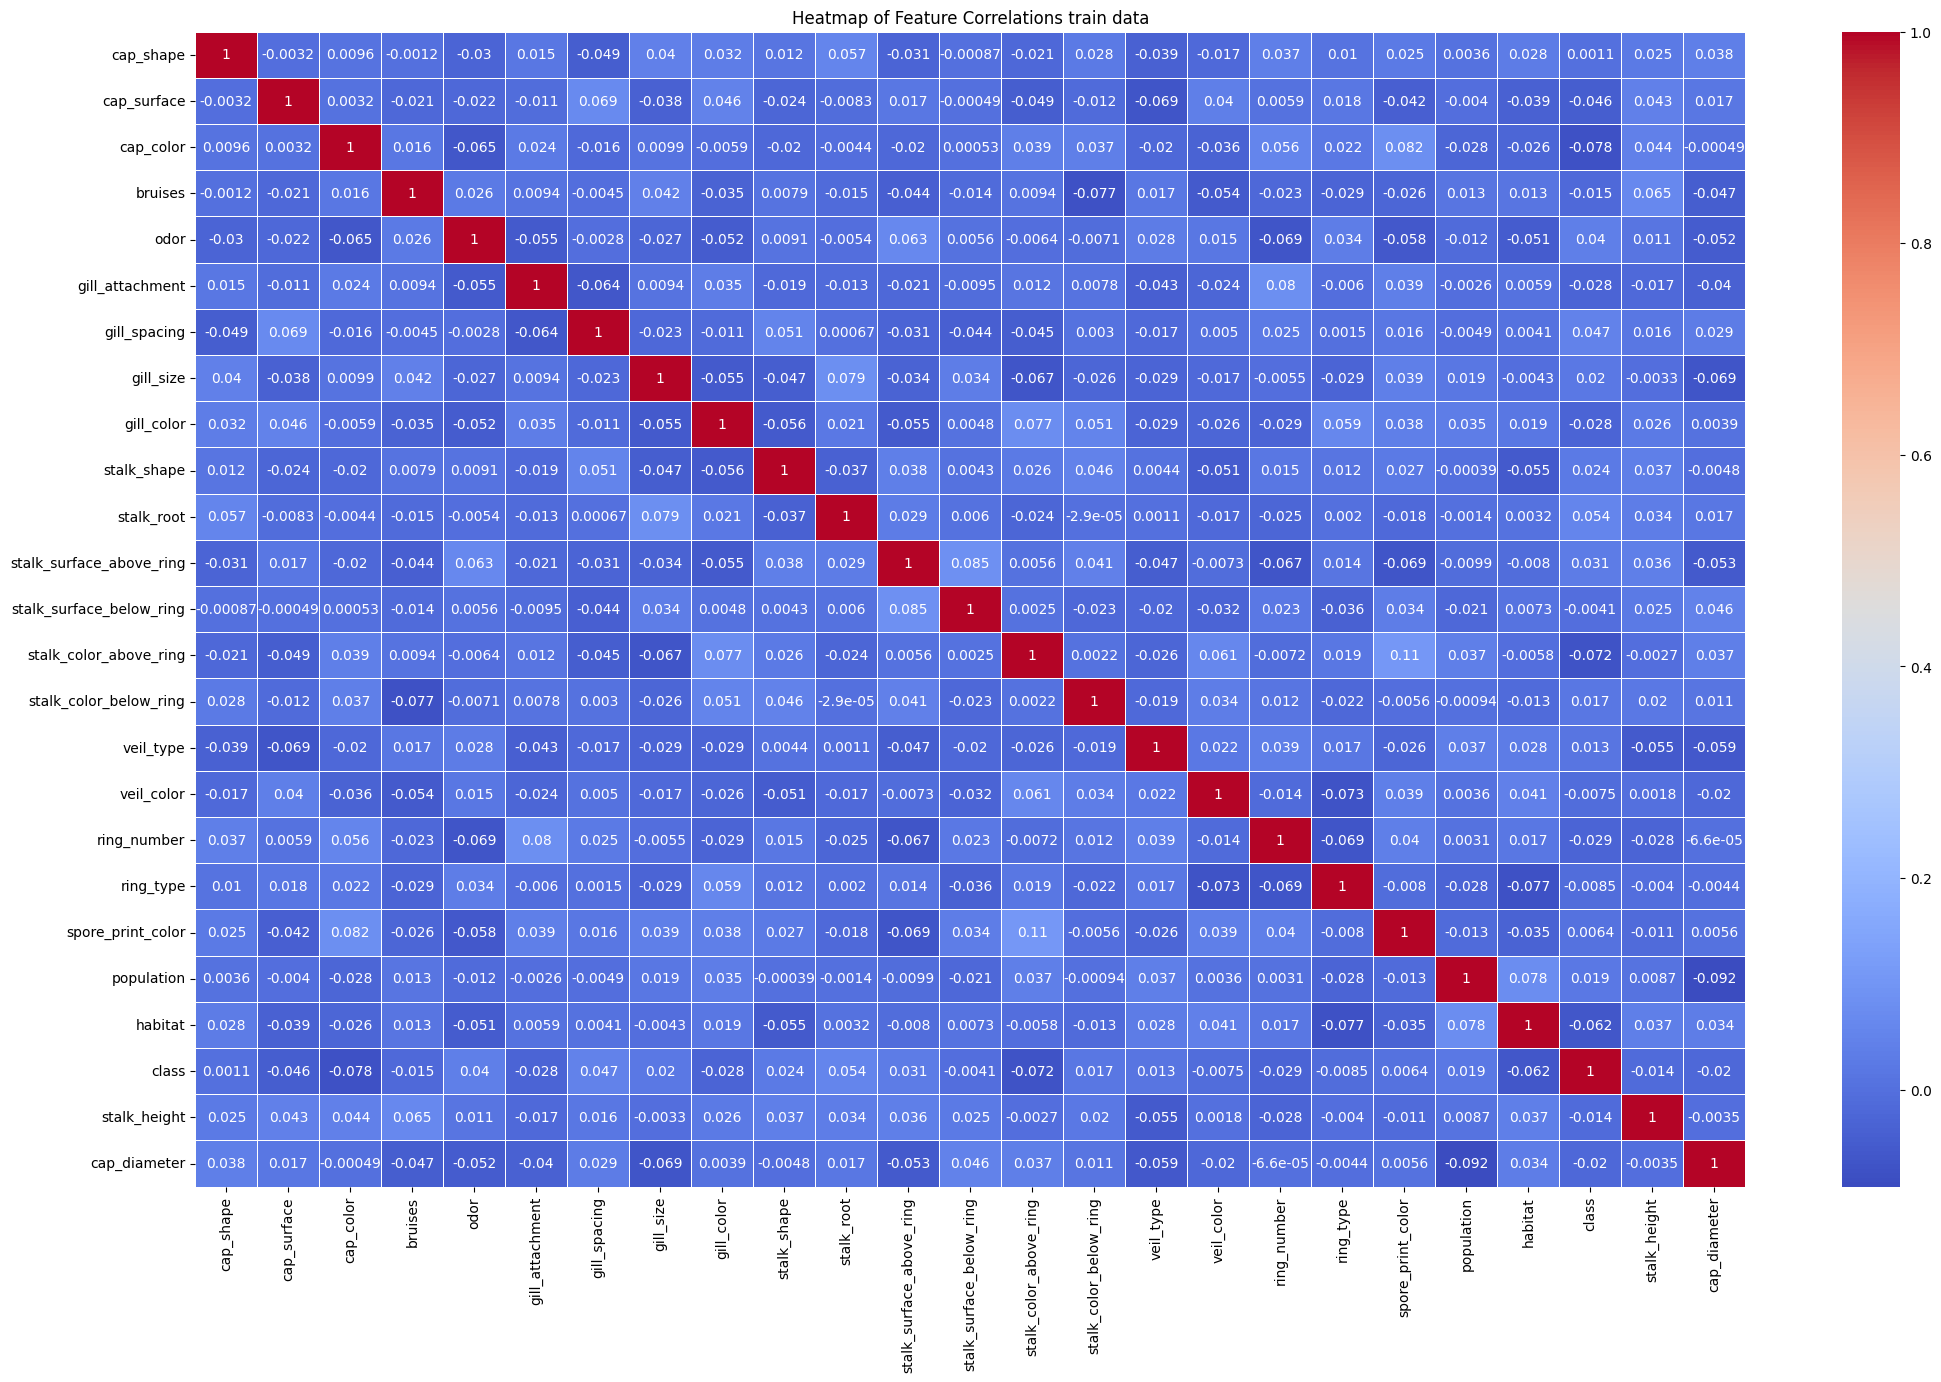

In [29]:
# Create the heatmap
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations train data')
plt.show()

- High Correlations:

  - **veil_type** is perfectly correlated with itself (1), but all other correlations are 0. This suggests that veil_type might be a constant variable in your dataset.
  - **gill_size** and **gill_color** have a relatively high positive correlation of 0.52.
  - **stalk_color_above_ring** and **stalk_color_below_ring** have a correlation of 0.96, indicating that these two features are very similar.
  - **bruises** and odor have a negative correlation of -0.55.
- Moderate Correlations:

  - **gill_spacing** and **gill_size** show a moderate negative correlation of -0.64.
  - **stalk_root** and **stalk_surface_below_ring** have a correlation of -0.41.
  - **gill_spacing** and **stalk_color_above_ring** have a correlation of -0.43.
  - **gill_size** and **cap_surface** have a correlation of 0.40.

- Low Correlations:

  - Most features have low or negligible correlations with each other, indicating a **weak linear relationship** between them.

In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = mushroom1.drop('class', axis=1)
y = mushroom1['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1600, 24) (400, 24) (1600,) (400,)


In [31]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize the SVM classifier
svm = SVC(kernel='linear')

In [32]:
# Train the SVM model
svm.fit(X_train, y_train)

# Predict on the test data
y_pred = svm.predict(X_test)

In [33]:
# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1: 0.800599700149925
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



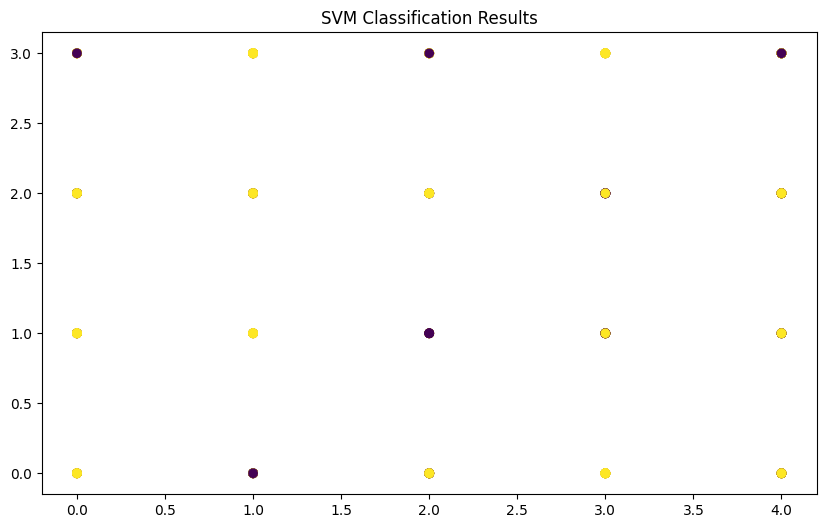

In [34]:
# Plotting decision boundaries is complex for high-dimensional data.
# Here, we can only visualize 2D decision boundaries.
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis')
plt.title("SVM Classification Results")
plt.show()

In [35]:
# Try different kernels and hyperparameters
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Kernel: linear
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Kernel: poly
Accuracy: 0.6925
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.14       133
           1       0.68      1.00      0.81       267

    accuracy                           0.69       400
   macro avg       0.84      0.54      0.48       400
weighted avg       0.79      0.69      0.59       400

Kernel: rbf
Accuracy: 0.6675
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy       

In [36]:
# Comparing performance metrics for different kernels
results = []
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision'],
        'Recall': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall'],
        'F1-Score': classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    })

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

   Kernel  Accuracy  Precision  Recall  F1-Score
0  linear    0.6675   0.445556  0.6675  0.534400
1    poly    0.6925   0.789481  0.6925  0.589038
2     rbf    0.6675   0.445556  0.6675  0.534400


- Linear kernel
  - The linear kernel has moderate accuracy.
  - Precision is relatively low, indicating that the linear kernel has a higher number of false positives.
  - Recall is moderate, meaning it correctly identifies a good proportion of the actual positives.
  - The F1-Score is a balance between precision and recall, suggesting moderate performance overall.

- Polynomial Kernel
  - The polynomial kernel has the highest accuracy among the three.
  - Precision is high, indicating fewer false positives.
  - Recall matches the accuracy, suggesting a good proportion of actual positives are identified.
  - The F1-Score is lower than precision but higher than the linear and rbf kernels, indicating a better balance between precision and recall for this kernel.

- Radial Basis Function (RBF) Kernel
  - The RBF kernel shows the same accuracy, precision, recall, and F1-Score as the linear kernel.
  - This suggests that the RBF kernel is not providing any additional benefit over the linear kernel for this particular dataset.


- The Polynomial (Poly) Kernel performs the best in terms of accuracy and precision, making it the most effective choice for your dataset.
- Both the Linear and RBF Kernels perform identically and less effectively compared to the polynomial kernel.

- Strengths of SVM for the Mushroom Dataset
  - Handling High-Dimensional Data:

    - SVM is effective in high-dimensional spaces, which is beneficial for the Mushroom dataset with many categorical features.
    - Using the kernel trick, SVM can handle non-linearly separable data, making it suitable for complex datasets like this one.
  - Robustness to Overfitting:

    - SVM is less prone to overfitting, especially with the right choice of kernel and regularization parameter (C).
  - Clear Margin of Separation:

    - SVM aims to find the hyperplane that maximizes the margin between classes, leading to better generalization.

- Weaknesses of SVM for the Mushroom Dataset
  - Computational Complexity:

    - Training an SVM can be computationally expensive, especially with large datasets. The Mushroom dataset has 2000 entries, which might be manageable but could still be intensive depending on the kernel used.
  - Choice of Kernel:

    - The performance of SVM heavily depends on the choice of kernel and its parameters. Improper selection can lead to suboptimal results.
  - Scaling Issues:

    - SVMs require feature scaling. If not done correctly, it can affect the model's performance.
  - Interpretability:

    - SVM models are not as interpretable as some other models (e.g., decision trees), making it harder to understand the feature importance directly.

Support Vector Machines (SVM) are powerful tools for classification tasks in various real-world applications. Here are some practical implications and considerations when using SVM in real-world scenarios:

1) **Accuracy and Robustness:**

  - *High Accuracy:* SVMs often achieve high accuracy in classification tasks, especially with well-tuned hyperparameters and appropriate kernels.
  - *Robustness:* They are less prone to overfitting, particularly with the right regularization parameter, making them reliable for various applications.

2) **Handling Complex Data:**

  - *Non-Linear Decision Boundaries:* Using the kernel trick, SVMs can model complex non-linear decision boundaries, which is advantageous in tasks where the relationship between features is not linear.
  - *High-Dimensional Spaces:* SVMs perform well in high-dimensional spaces, making them suitable for text classification, image recognition, and bioinformatics.

3) **Scalability and Efficiency:**

  - *Scalability Issues:* While SVMs are effective for smaller datasets, they can be computationally expensive for large datasets. This necessitates the use of techniques like the LinearSVM for linear problems or approximations like the Sequential Minimal Optimization (SMO) for non-linear problems.
  - *Training Time:* The training time for SVMs can be significant, especially with large datasets and non-linear kernels. This can limit their practicality in real-time or large-scale applications.

Support Vector Machines are versatile and powerful classifiers suitable for a variety of real-world tasks. They excel in high-dimensional and complex datasets but require careful preprocessing and parameter tuning. While they may not be as interpretable as some other models, their robustness and accuracy make them valuable tools in many practical applications. However, for large-scale problems or when interpretability is paramount, alternative approaches or complementary methods may be more appropriate.